<a href="https://colab.research.google.com/github/Diwakar-Gupta/LrcDataScience/blob/main/22-01-24-KNN/Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [31]:
from plotly import data

In [33]:
iris = data.iris()
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
11,4.8,3.4,1.6,0.2,setosa,1
144,6.7,3.3,5.7,2.5,virginica,3
133,6.3,2.8,5.1,1.5,virginica,3
54,6.5,2.8,4.6,1.5,versicolor,2
83,6.0,2.7,5.1,1.6,versicolor,2


In [49]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   species_id    150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [41]:
X = iris.drop(['species',	'species_id'], axis = 1)
y = iris['species_id']

In [65]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y)

# Scratch

In [109]:
class KNN():
    def __init__(self, k = 3):
        self.k = k
    
    def fit(self, X, Y):
        self.x_train = X
        self.y_train = Y
    
    def distance(self, a, b):# L2
        return np.sqrt(((a-b)**2).sum())

    def label(self, xq):
        dist = np.zeros(self.x_train.shape[0])

        for i, xtrain in enumerate(self.x_train.values):
            dist[i] = self.distance(xtrain, xq)
        
        idx = np.argsort(dist)
        idx = idx[:self.k]
        label = self.y_train.iloc[idx]
        label, count = np.unique(label, return_counts=True)
        idx = count.argmax()
        return label[idx]

    def predict(self, x_test):
        y_pred = np.full(x_test.shape[0], self.y_train.iloc[0])
        
        for i, x in enumerate(x_test.values):
            l = self.label(x)
            y_pred[i] = l
        return y_pred

In [110]:
model = KNN()

model.fit(xtrain, ytrain)

In [111]:
y_pred = model.predict(xtest)

In [112]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_pred)

0.9736842105263158

In [121]:
from sklearn.neighbors import KNeighborsClassifier

modelsk = KNeighborsClassifier(n_neighbors = 3, n_jobs=-1)
modelsk.fit(xtrain, ytrain)
accuracy_score(ytest, modelsk.predict(xtest))

0.9736842105263158

# loc iloc

In [102]:
S = pd.Series([1,2,3,4], index = [7,8,6,5])
S

7    1
8    2
6    3
5    4
dtype: int64

In [108]:
S.iloc[0:3]  # excluded
# S.loc[8:5] # explicit

7    1
8    2
6    3
dtype: int64

# K Best value


In [118]:
test = []
train = []

for i in range(1, 100):
    model = KNN(k = i)
    model.fit(xtrain, ytrain)

    testerr = accuracy_score(ytest, model.predict(xtest))
    test.append(testerr)

    trainerr = accuracy_score(ytrain, model.predict(xtrain))
    train.append(trainerr)

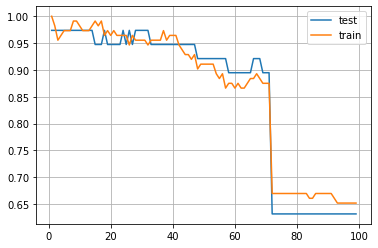

In [119]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1, 100), test, label = 'test')
plt.plot(np.arange(1, 100), train, label = 'train')
plt.legend()
plt.grid()